In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from wordcloud import WordCloud, STOPWORDS
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
import math
import re
import nltk
from nltk.stem.snowball import FrenchStemmer

In [2]:
#importation de la donnée
donnees = pd.read_csv("nettoyage.csv", delimiter="\t")

In [3]:
df = donnees.copy()

In [4]:
#ceci est facultatif vu que ces variables sont déjà des données textes
df['product_name'] = df['product_name'].astype('str')
df['brands'] = df['brands'].astype('str')
df['ingredients_text'] = df['ingredients_text'].astype('str')
#df['brands'].fillna('Null', inplace = True)

In [5]:
product_name_corpus = ' '.join(df['product_name'])
product_name_corpus = re.sub(' +', ' ', product_name_corpus)
product_name_corpus = product_name_corpus.strip()

brands_corpus = ' '.join(df['brands'])
brands_corpus = re.sub(' +', ' ', brands_corpus)
brands_corpus = brands_corpus.strip()

ingredients_text_corpus = ' '.join(df['ingredients_text'])
ingredients_text_corpus = re.sub(' +', ' ', ingredients_text_corpus)
ingredients_text_corpus = ingredients_text_corpus.strip()

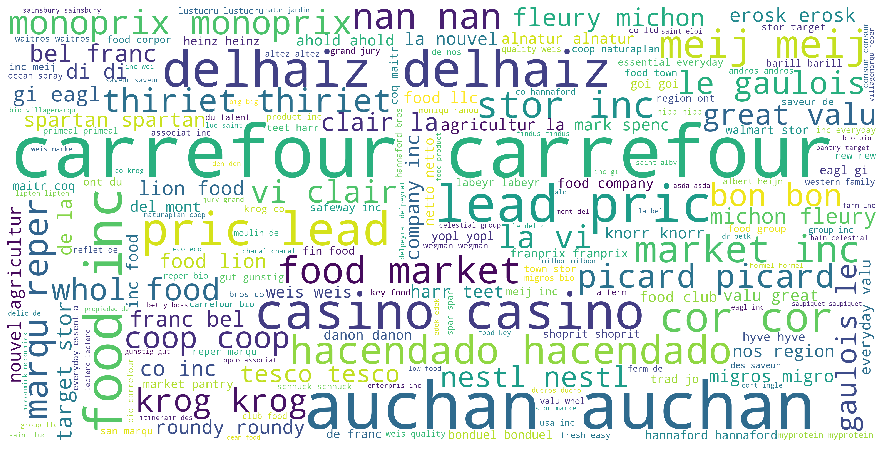

In [6]:
brands_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(brands_corpus)
plt.figure(figsize = (16,8))
plt.imshow(brands_wordcloud)
plt.axis('off')
plt.show()

In [7]:
df['content'] = df[['product_name', 'brands', 'ingredients_text']].astype(str).apply(lambda x: ' '.join(x), axis = 1)

In [8]:
#hyperparamètre de Knn
def hyperparametre(dat=df):
    data = dat[dat['nutrition_grade_fr'].notna()]
    target = data['nutrition_grade_fr'].values
    data = data[['energy_100g','saturated-fat_100g','sugars_100g','fiber_100g',
            'proteins_100g','salt_100g','fruits-vegetables-nuts_100g']].values
    xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)
    errors = []
    hyperparam = -1
    min_error = 100
    for k in range(2,15):
        knn = neighbors.KNeighborsClassifier(k)
        error = 100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest))
        errors.append(error)
        if min_error > error:
            min_error = error
            hyperparam = k
    print("l'hyper-paramètre est de : {}".format(hyperparam))
    plt.plot(range(2,15), errors, 'o-')
    plt.show()
    return hyperparam

#modèle Knn de remplissage de Nutriscore
def nutriGrade(index, hyperparam, dat=df):
    data = dat[dat['nutrition_grade_fr'].notna()]
    target = data['nutrition_grade_fr'].values
    data = data[['energy_100g','saturated-fat_100g','sugars_100g','fiber_100g',
            'proteins_100g','salt_100g','fruits-vegetables-nuts_100g']].values   
    #classification
    knn = neighbors.KNeighborsClassifier(n_neighbors=hyperparam)
    knn.fit(data, target)
    d = dat[dat['nutrition_grade_fr'].isna()]
    elt_to_predict = list(d[d.index == index][['energy_100g','saturated-fat_100g','sugars_100g','fiber_100g',
                                               'proteins_100g','salt_100g','fruits-vegetables-nuts_100g']].values)
    predicted = knn.predict(elt_to_predict)[0]
    return predicted

l'hyper-paramètre est de : 3


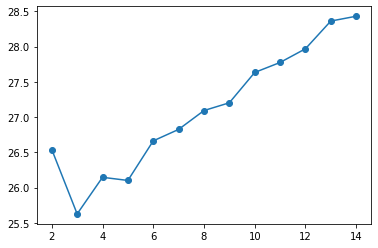

In [9]:
hp = hyperparametre()

In [10]:
df['content'].head(5)

0                  cacao    
1             sfiudwx watt  
2       sauc sweety chil    
3               min coco    
4    pistou dail des our    
Name: content, dtype: object

In [11]:
corpus = (list(df['content'].values))

In [12]:
freq = {}
stats = {}
for k in corpus:
    words = nltk.word_tokenize(k)
    for word in words:
        if word in freq:
            freq[word] += 1
        else:
            freq[word] = 1
for word in freq:
    stats[word] = {"total": freq[word]}

In [13]:
dfm = pd.DataFrame.from_dict(stats, orient='index')

result = dfm.sort_values(['total'], ascending=False)

#dfm.plot(kind='bar', color="#f56900", title='Top 50 des mots les plus communs')

In [14]:
res = list(result.index)
len_one = []
for r in res:
    if len(r) == 1:
        len_one.append(r)
len_one
my_stop_words = list(set(nltk.corpus.stopwords.words('french') + len_one))

In [15]:
my_stop_words

['x',
 'seraient',
 'étais',
 'était',
 'nos',
 'eussions',
 'et',
 'as',
 'aies',
 'eût',
 'j',
 'étante',
 'toi',
 'dans',
 'l',
 'moi',
 'avait',
 'ayez',
 'étant',
 'je',
 'la',
 'serai',
 'eue',
 'eûtes',
 'à',
 'étaient',
 'étées',
 'êtes',
 'avez',
 'furent',
 'aurons',
 'ayant',
 'fut',
 'mais',
 'serait',
 'aurez',
 'ne',
 'ayantes',
 'mes',
 'n',
 'ma',
 'fût',
 'auriez',
 'serions',
 'eu',
 'étée',
 'soyez',
 'k',
 'en',
 'ta',
 'f',
 'ou',
 'notre',
 'ayante',
 'avais',
 'ait',
 'même',
 'a',
 'sommes',
 'eux',
 'w',
 'des',
 'fussiez',
 'ayants',
 'me',
 'au',
 'elle',
 'auras',
 'eûmes',
 'c',
 'q',
 'auront',
 'serons',
 'sois',
 'votre',
 't',
 'eus',
 'qui',
 'fussions',
 'aient',
 'étés',
 'étants',
 'i',
 'il',
 'soient',
 'u',
 'ces',
 'eurent',
 'fûmes',
 'étantes',
 'seriez',
 'qu',
 'serez',
 'aura',
 'lui',
 'auraient',
 'ton',
 'o',
 'b',
 'on',
 'ses',
 'vos',
 'suis',
 'eues',
 'nous',
 'est',
 'leur',
 'pas',
 'z',
 'vous',
 'avions',
 'tes',
 'aurait',
 'v'

In [16]:
#lemmatisation snowball
stemmer = FrenchStemmer(ignore_stopwords=True)
def stem(expr):
    words_stems = []
    if type(expr) == str:#eviter les nan
        expr_words = nltk.word_tokenize(expr)
        for word in expr_words:
            words_stems.append(stemmer.stem(word))
        return " ".join(words_stems)
    return expr

def del_ponct(val):
    if type(val) == str:# éviter les nan
        val = val.lower()
        val = re.compile('[éèêë]+').sub("e", val)
        val = re.compile('[àâä]+').sub("a", val)
        val = re.compile('[ùûü]+').sub("u", val)
        val = re.compile('[îï]+').sub("i", val)
        val = re.compile('[ôö]+').sub("o", val)
        return re.compile('[^A-Za-z" "]+').sub("", val)
    return val

In [17]:
vectorizer = CountVectorizer(stop_words = my_stop_words)
X = vectorizer.fit_transform(corpus)

In [18]:
#Système de recommandation des produits
def recommandation(product, nb = 10):
    #supprimer les ponctuations, chiffre et rendre minuscule
    product = del_ponct(product)
    #lemmatisation
    product = stem(product)
    Y = vectorizer.transform([product])
    cosine_similarities = cosine_similarity(X, Y)
    cos_sim = cosine_similarities[:, 0]
    indices = cos_sim.argsort()[-nb:][::-1]
    i = 0
    color = {"a": "\u001b[32;1m", "b":"\u001b[32m", "c":"\033[33m", "d":'\033[93m', "e":"\033[31m"}
    color_nova = {"1.0":"\u001b[32m", "2.0":"\033[33m", "3.0":'\033[93m', "4.0":"\033[31m"}
    for ind in indices:
            
        print("\nRecommandation {} : {}".format((i+1), df.loc[ind, 'product']))
        
        if type(df.loc[ind, "nutrition_grade_fr"]) == str:
            grade = df.loc[ind, 'nutrition_grade_fr']
            print("Nutri-grade: {} {} \033[0m".format(color[grade], grade))
        else:
            grade = nutriGrade(ind, hp)#classification
            print("Nutri-grade: {} {} \033[0m".format(color[grade], grade + "\033[0m (predicted)"))
        
        if math.isnan(df.loc[ind, "nova_group"]):
            print("Nova groupe : inconnu")
        else:
            nova = str(df.loc[ind, "nova_group"])
            print("Nova groupe : {} {} \033[0m".format(color_nova[nova], df.loc[ind, 'nova_group']))
            
        print('\u001b[32m' + "Proteine : {}g".format(df.loc[ind, 'proteins_100g']))
        print("Fibre : {}g".format(df.loc[ind, 'fiber_100g']))
        print("Fruit et légume : {}g \033[0m".format(df.loc[ind, 'fruits-vegetables-nuts_100g']))
            
        print("\033[93m" + "Energie : {}kJ".format(df.loc[ind, 'energy_100g']))
        print("Matière grasse : {}g".format(df.loc[ind, 'fat_100g']))
        print("Sel : {}g".format(df.loc[ind, 'salt_100g']))
        print("Sucre : {}g \033[0m".format(df.loc[ind, 'sugars_100g']))
            
        print("Code Open Foods Fact BD: {}".format(df.loc[ind, 'code']))
        i = i + 1

In [19]:
recommandation("sucrerie", 5)


Recommandation 1 : Sucrerie de cenelle en rondelles
Nutri-grade:  c (predicted) 
Nova groupe : inconnu
Proteine : 0.0g
Fibre : 0.0g
Fruit et légume : 0.0g 
Energie : 837.0kJ
Matière grasse : 0.0g
Sel : 0.0g
Sucre : 44.0g 
Code Open Foods Fact BD: 6938106760181

Recommandation 2 : Sucreries sans sucres
Nutri-grade:  b (predicted) 
Nova groupe : inconnu
Proteine : 0.0g
Fibre : 0.0g
Fruit et légume : 0.0g 
Energie : 0.0kJ
Matière grasse : 0.0g
Sel : 0.0g
Sucre : 0.0g 
Code Open Foods Fact BD: 8690624900439

Recommandation 3 : Sucre brute de canne
Nutri-grade:  b (predicted) 
Nova groupe : inconnu
Proteine : 0.0g
Fibre : 0.0g
Fruit et légume : 0.0g 
Energie : 0.0kJ
Matière grasse : 0.0g
Sel : 0.0g
Sucre : 0.0g 
Code Open Foods Fact BD: 3308751000612

Recommandation 4 : Sucre blanc
Nutri-grade:  b (predicted) 
Nova groupe : inconnu
Proteine : 0.0g
Fibre : 0.0g
Fruit et légume : 0.0g 
Energie : 0.0kJ
Matière grasse : 0.0g
Sel : 0.0g
Sucre : 0.0g 
Code Open Foods Fact BD: 3308751000315

Reco